In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
behaviors_data = pd.read_csv(
    "MINDsmall_train/behaviors.tsv",
    sep='\t',
    names=["impressionId","userId","timestamp","click_history","impressions"]
)


news_data = pd.read_csv("MINDsmall_train/news.tsv",
    sep='\t',
    names=["newsId", "category", "subcategory", "title","abstract", "url", "title_entities","abstract_entities"]
)

In [4]:
# Function to split the impressions and clicks into two seperate lists
def process_impression(impression_list):
    list_of_strings = impression_list.split()
    click = [x.split('-')[0] for x in list_of_strings if x.split('-')[1] == '1']
    non_click = [x.split('-')[0] for x in list_of_strings if x.split('-')[1] == '0']
    return click,non_click

# We can then indexize these two new columns:
behaviors_data['click'], behaviors_data['noclicks'] = zip(*behaviors_data['impressions'].map(process_impression))

In [5]:
behaviors_data.head()

,impressionId,userId,timestamp,click_history,impressions,click,noclicks
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,[N55689],[N35729]
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,[N17059],"[N20678, N39317, N58114, N20495, N42977, N2240..."
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,[N23814],"[N50014, N23877, N35389, N49712, N16844, N5968..."
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,[N49685],"[N35729, N33632, N27581]"
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,[N8400],"[N39985, N36050, N16096, N22407, N60408, N6149..."


In [6]:
print(f"Number of articles: {news_data["newsId"].count()}")
print(f"Number of users: {behaviors_data["userId"].count()}")
print(f"Number of impressions: {behaviors_data["impressionId"].count()}")
print(f"Number of clicks: {behaviors_data["click"].count()}")
behaviors_data.head()

Number of articles: 51282
Number of users: 156965
Number of impressions: 156965
Number of clicks: 156965


,impressionId,userId,timestamp,click_history,impressions,click,noclicks
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,[N55689],[N35729]
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,[N17059],"[N20678, N39317, N58114, N20495, N42977, N2240..."
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,[N23814],"[N50014, N23877, N35389, N49712, N16844, N5968..."
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,[N49685],"[N35729, N33632, N27581]"
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,[N8400],"[N39985, N36050, N16096, N22407, N60408, N6149..."


In [12]:
df = behaviors_data[["impressionId", "impressions"]]
df["num_impressions"] = df["impressions"].apply(lambda x: len(x.split()))

df

C:\Users\Sindr\AppData\Local\Temp\ipykernel_21776\3876792574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_impressions"] = df["impressions"].apply(lambda x: len(x.split()))


,impressionId,impressions,num_impressions
0,1,N55689-1 N35729-0,2
1,2,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,11
2,3,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,36
3,4,N35729-0 N33632-0 N49685-1 N27581-0,4
4,5,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,69
...,...,...,...
156960,156961,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...,31
156961,156962,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...,89
156962,156963,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...,43
156963,156964,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...,119


<Axes: xlabel='category'>

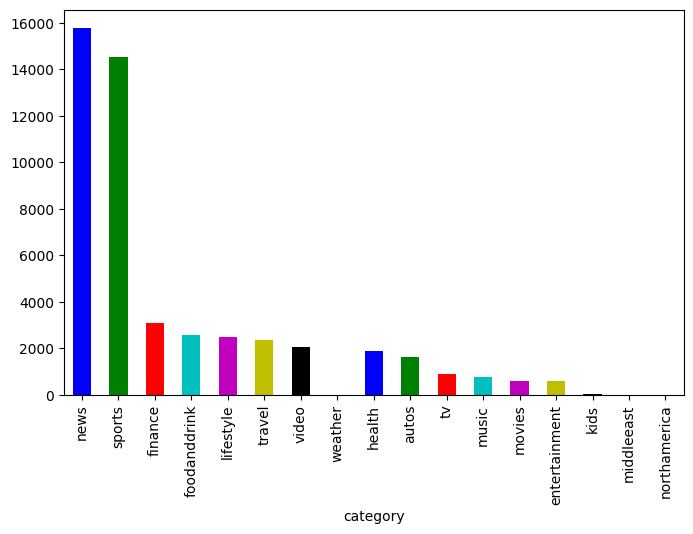

In [8]:
df = news_data
# give a different color to each category
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# plot the category counts
df["category"].value_counts().plot(kind='bar', figsize= (8,5),color=colors)
